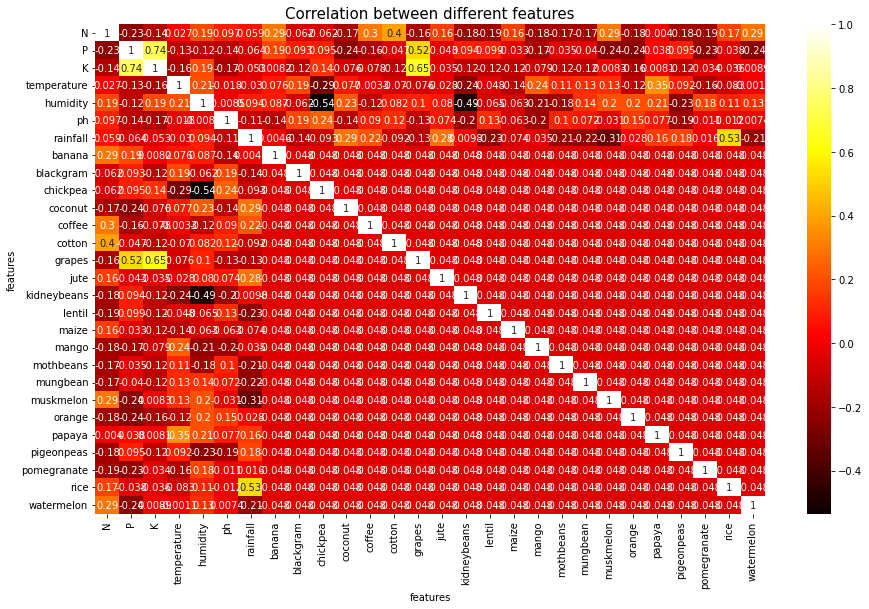

The accuracy of this model is:  98.18181818181819


ModuleNotFoundError: ignored

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Reading the csv file
crop=pd.read_csv('Crop_recommendation.csv')
crop.head()

#create dummies for label
label= pd.get_dummies(crop.label).iloc[: , 1:]
crop= pd.concat([crop,label],axis=1)
crop.drop('label', axis=1,inplace=True)


#input data (x,regressor)
x=crop.iloc[:,1:8].values
y=crop.iloc[:,8:].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='hot')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

#importing decision tree
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)
p=clf.predict(x_test)

# Finding the accuracy of the model
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,p)
print("The accuracy of this model is: ", acc*100)


from django.contrib import admin







# New Section